## Import Libararies

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read data from the file 

In [7]:
cwd = os.getcwd()
path = os.path.join(cwd,'framingham.csv')
data = pd.read_csv(path)
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Review general properties of the dataset

In [8]:
data.shape

(4238, 16)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [10]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Check the null values

In [13]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# Replace null values with the mean values for a respective column

In [18]:
columns_with_na = ['education','cigsPerDay','BPMeds','totChol','BMI','heartRate','glucose']

for i in columns_with_na: 
#     data[i].replace(0,np.nan,inplace=True)
    data[i].fillna(data[i].mean(),inplace=True)
    
data.isnull().sum() # Check again the null values

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [19]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.00000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.02963,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.007075,0.500024,11.879230,0.16852,0.076587,0.462763,0.158316,44.326453,22.038097,11.910850,4.070953,12.025177,22.836603,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.00000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.00000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Check unique values

In [20]:
data.nunique()

male                  2
age                  39
education             5
currentSmoker         2
cigsPerDay           34
BPMeds                3
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             249
sysBP               234
diaBP               146
BMI                1364
heartRate            74
glucose             144
TenYearCHD            2
dtype: int64

# Exploratory data analysis

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


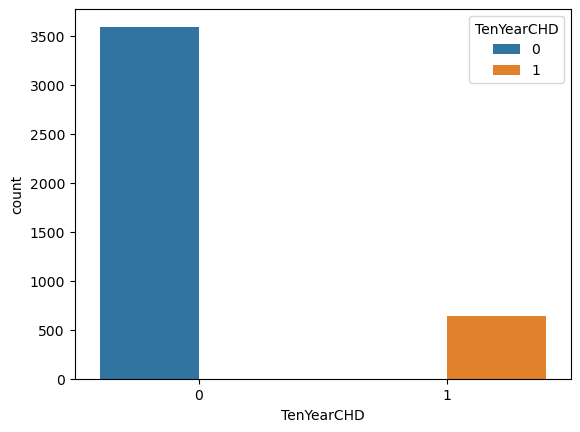

In [29]:
sns.countplot(data['TenYearCHD'],hue=data['TenYearCHD'])
plt.show()

In [ ]:
# It can be shown from the count plot above that, the data contains less predictions of 1 compared to 0.

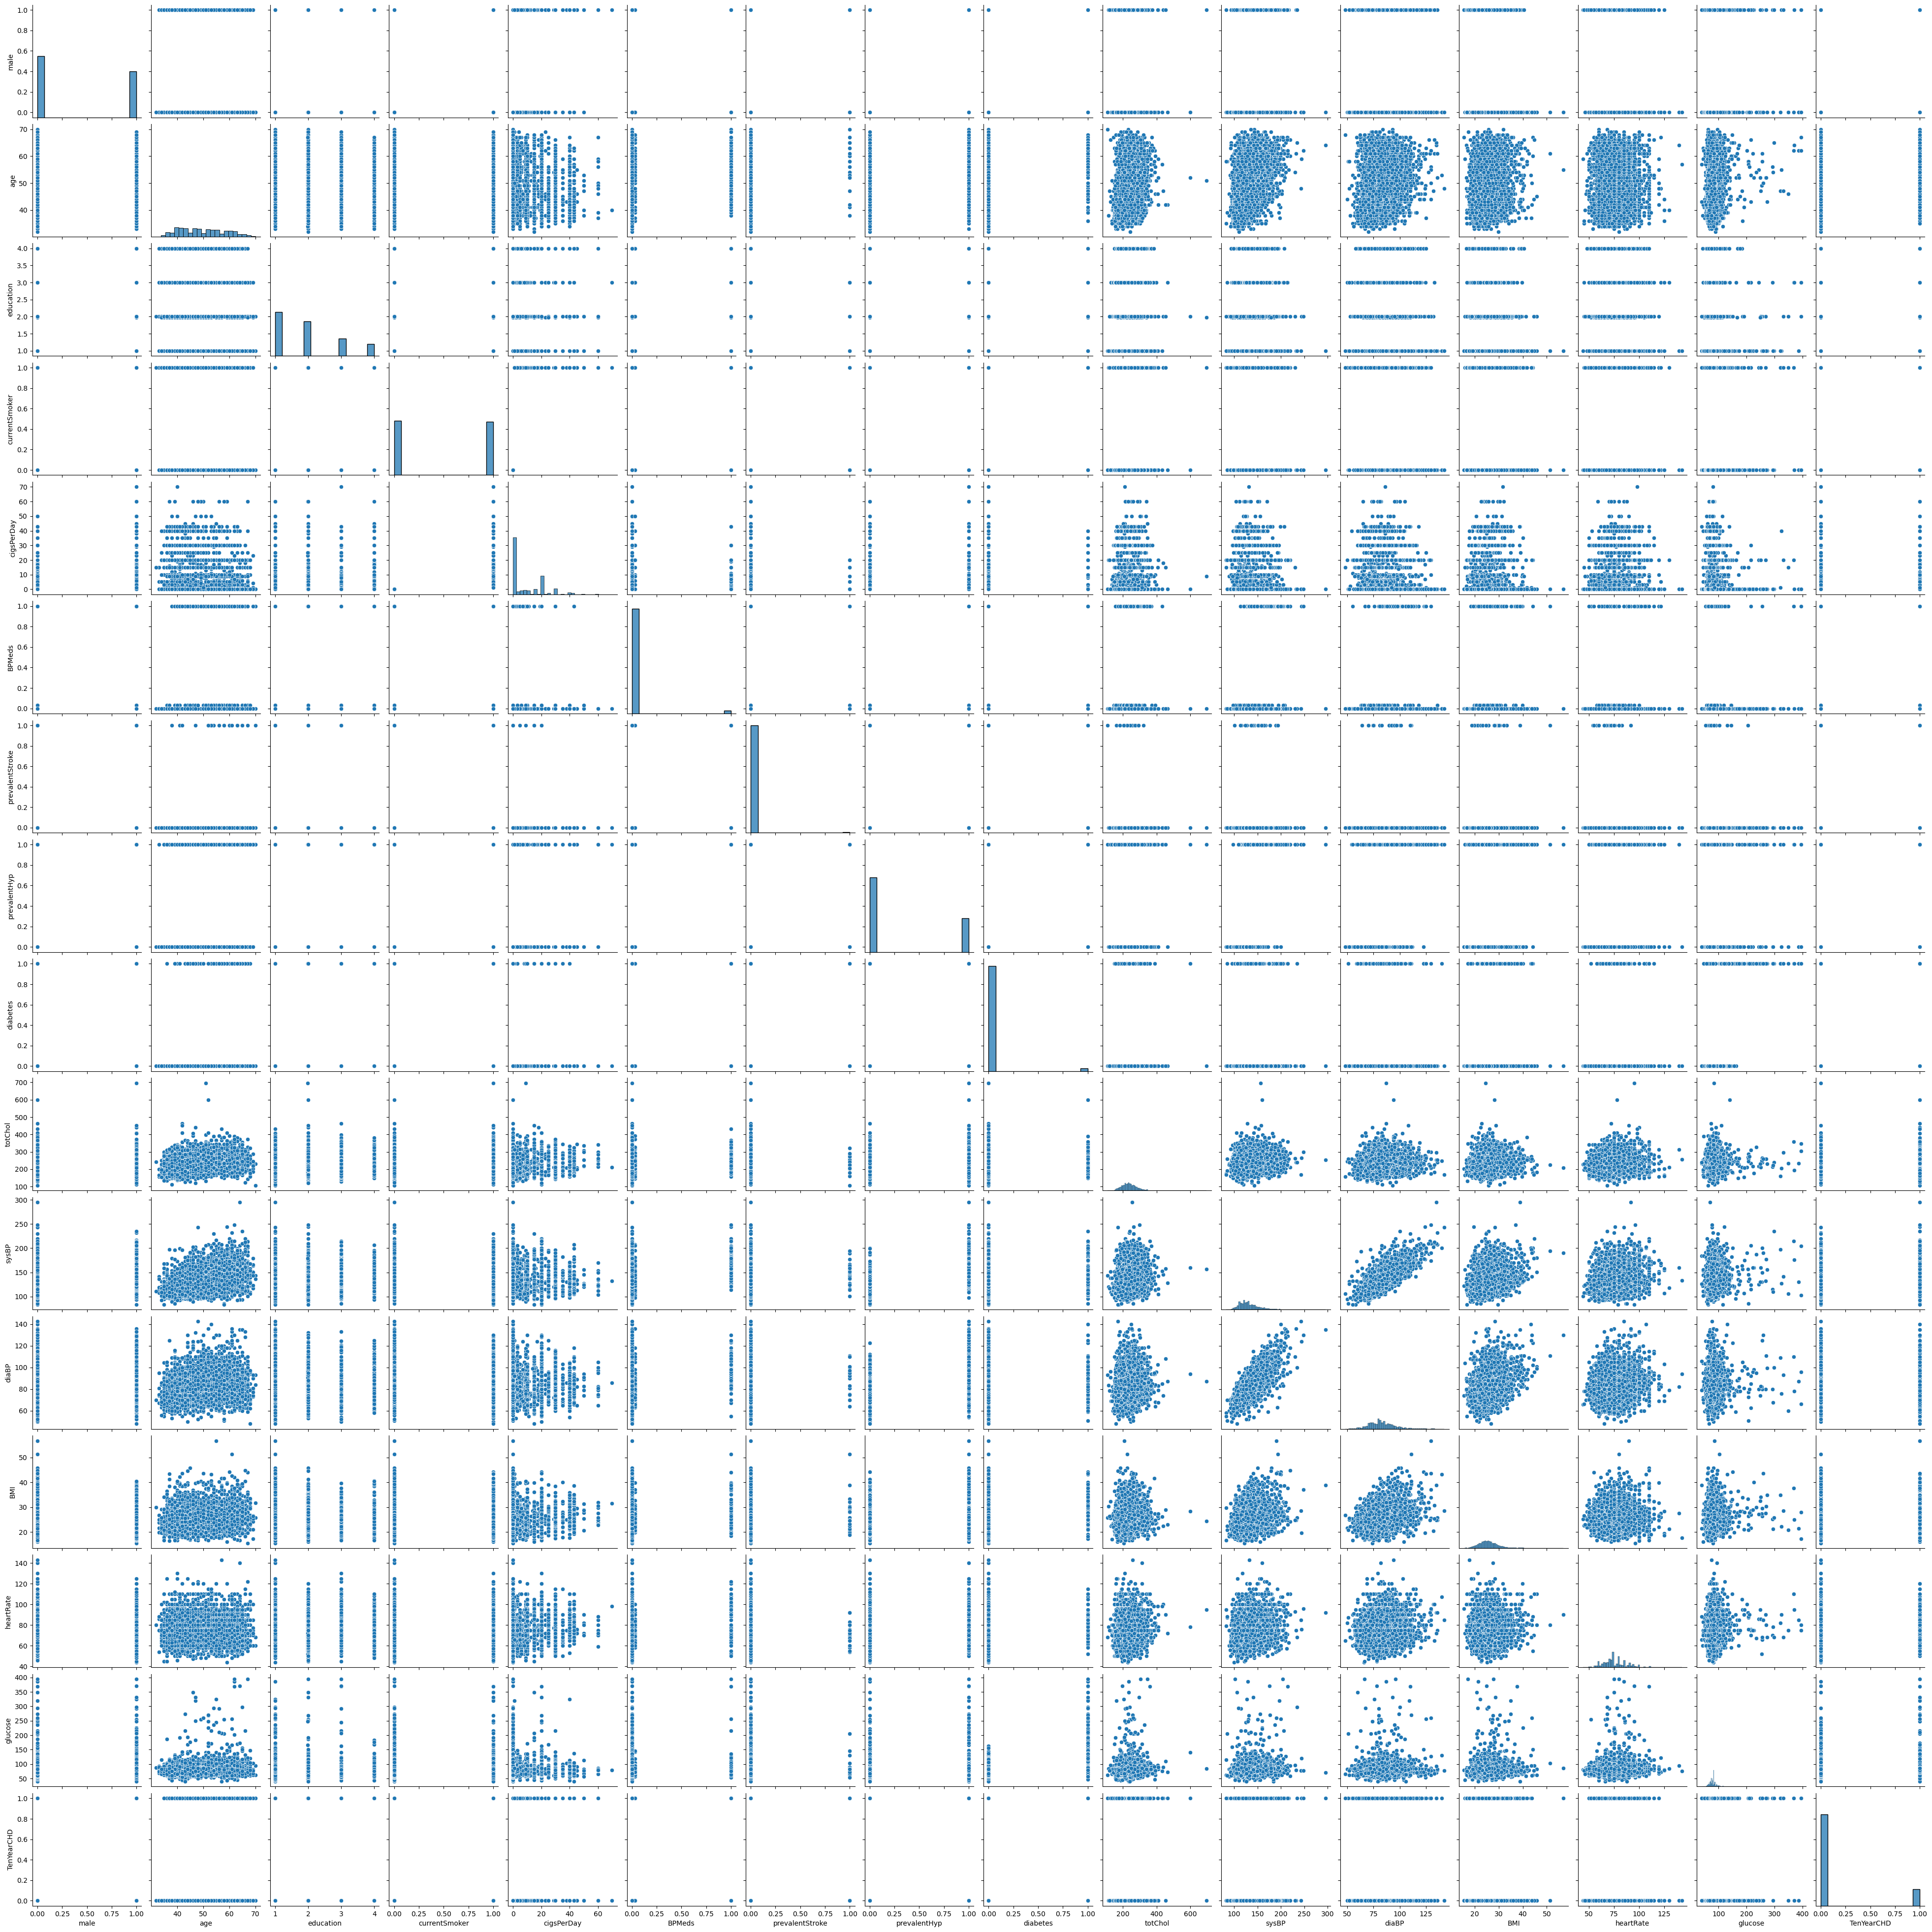

In [23]:
sns.pairplot(data)
plt.show()

# Check correlation heatmap for all values

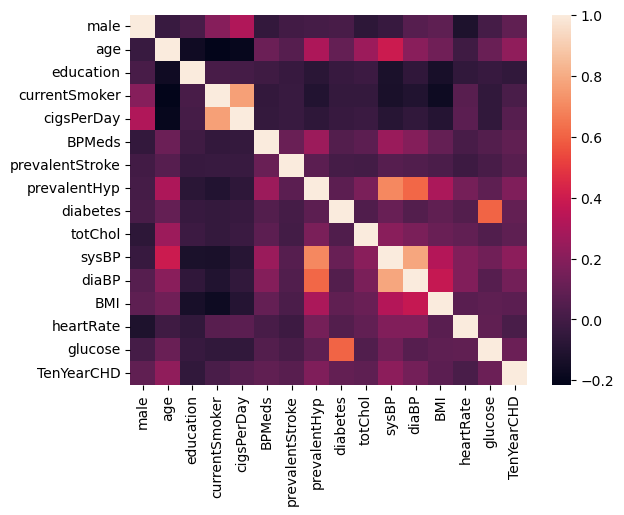

In [32]:
sns.heatmap(data.corr())
plt.show()

## Identify and remove highly correlated features

In [34]:
highly_correlated_features = ['currentSmoker','diaBP','prevalentHyp','diabetes']
# remove these features from the dataset since they highly correlate with other features from the dataset

data.drop(highly_correlated_features,axis=1,inplace=True)

## Plot the correlation heatmap again to confirm

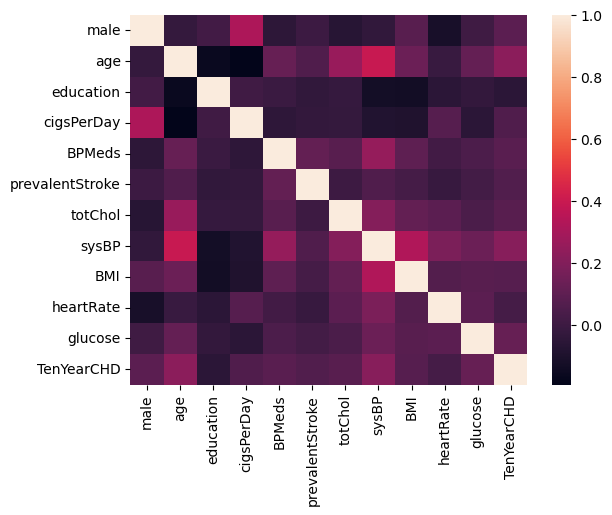

In [35]:
sns.heatmap(data.corr())
plt.show()

# Prepare dataset for training

In [38]:

X = data.drop('TenYearCHD',axis=1)
y = data['TenYearCHD']



# Use SMOTE to balance the dataset

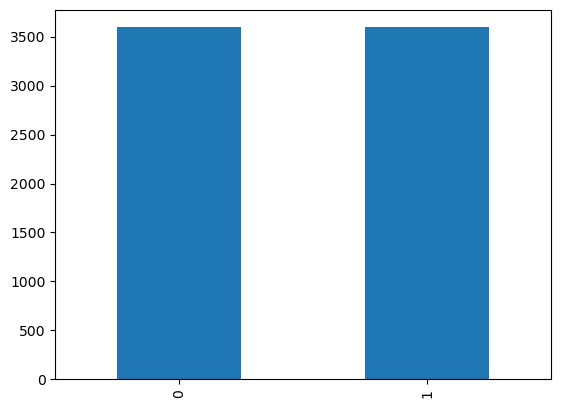

In [53]:
#Using SMOTE to balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_ros, y_ros = smote.fit_resample(X, y)
ros_chd_plot=y_ros.value_counts().plot(kind='bar')
plt.show()

# Split dataset to train and test sets

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.2,random_state=42)
X_train.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,totChol,sysBP,BMI,heartRate,glucose
7151,0,60,1.775834,36.120829,0.00000,0,228.060414,149.387917,27.417043,66.224166,96.267089
6253,0,62,3.764410,0.000000,0.92147,0,274.314120,168.570599,29.149059,99.214701,80.314120
4666,0,62,1.644219,3.865312,0.00000,0,249.692500,163.552734,27.702833,72.797969,106.423125
940,0,53,2.000000,0.000000,0.00000,0,284.000000,167.500000,31.500000,88.000000,87.000000
1511,0,38,2.000000,0.000000,0.00000,0,255.000000,125.000000,23.050000,72.000000,73.000000


In [58]:
# Scale the data before setting them to the model

In [60]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train))
X_test=pd.DataFrame(sc.transform(X_test))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.782304,1.051991,-0.159863,2.219348,-0.232953,-0.063372,-0.261912,0.517776,0.332276,-0.856786,0.423234
1,-0.782304,1.293866,1.946764,-0.786982,4.922581,-0.063372,0.770285,1.320804,0.769757,2.003012,-0.130754
2,-0.782304,1.293866,-0.299292,-0.465273,-0.232953,-0.063372,0.220829,1.110745,0.404462,-0.286933,0.775916
3,-0.782304,0.205426,0.077610,-0.786982,-0.232953,-0.063372,0.986435,1.275986,1.363568,1.030861,0.101422
4,-0.782304,-1.608641,0.077610,-0.786982,-0.232953,-0.063372,0.339271,-0.503154,-0.770772,-0.356105,-0.384747


In [ ]:
# Reset colmns (Scaling removed column indexes)

In [62]:

X_train.columns= X.columns   
X_test.columns= X.columns

y_train.index= X_train.index
y_test.index= X_test.index

## Custom function to print the confusion matrix

In [67]:
from sklearn.metrics import classification_report
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# Create a Logistic regression model

In [68]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

# Make predictions on the test set

In [69]:
predictions = model.predict(X_test)

# Evaluate the model

Classificatio report               precision    recall  f1-score   support

           0       0.66      0.67      0.66       752
           1       0.63      0.62      0.63       686

    accuracy                           0.65      1438
   macro avg       0.65      0.64      0.64      1438
weighted avg       0.65      0.65      0.65      1438

********
Accuracy with Logistic Regression:  0.6460361613351877
********
              precision    recall  f1-score   support

           0       0.66      0.67      0.66       752
           1       0.63      0.62      0.63       686

    accuracy                           0.65      1438
   macro avg       0.65      0.64      0.64      1438
weighted avg       0.65      0.65      0.65      1438



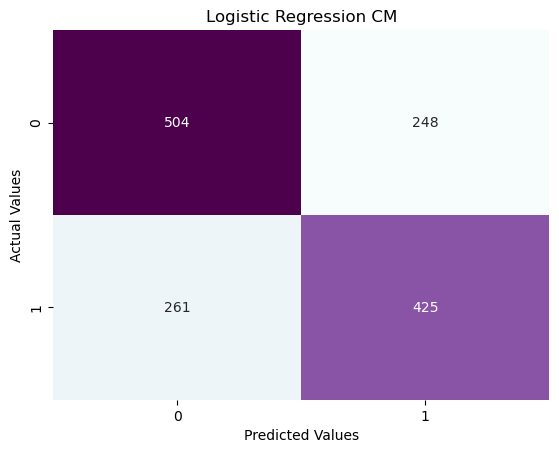

The confusion matrix [[504 248]
 [261 425]]


In [70]:

from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

print('Classificatio report',classification_report(y_test,predictions))
print('********')

print('Accuracy with Logistic Regression: ',accuracy_score(y_test,predictions))
print('********')

print('The confusion matrix',my_confusion_matrix(y_test,predictions,'Logistic Regression CM'))

## Using backward elimination to drop insignificant columns(P-Value>0.05)

In [71]:
import statsmodels.api as sm
regressor_ols=sm.OLS(endog=y_train,exog=X_train).fit()

#Backward Elim
X_opt_train=pd.DataFrame(X_train[:],dtype=float)
while True:
    for h in range(X_opt_train.shape[1]):
        regressor_ols=sm.OLS(endog=y_train,exog=X_opt_train).fit()
        if regressor_ols.pvalues[h] == regressor_ols.pvalues.max() and regressor_ols.pvalues[h] > 0.05:
            X_opt_train.drop(X_opt_train.columns[h],axis=1,inplace=True)
            break
    if regressor_ols.pvalues.max() <= 0.05:
        break

significant_cols=X_opt_train.columns
significant_cols

Index(['male', 'age', 'cigsPerDay', 'sysBP', 'glucose'], dtype='object')

In [82]:
X_train_sig = X_train[significant_cols]
X_test_sig = X_test[significant_cols]
X_train_sig.head()

,male,age,cigsPerDay,sysBP,glucose
0,-0.782304,1.051991,2.219348,0.517776,0.423234
1,-0.782304,1.293866,-0.786982,1.320804,-0.130754
2,-0.782304,1.293866,-0.465273,1.110745,0.775916
3,-0.782304,0.205426,-0.786982,1.275986,0.101422
4,-0.782304,-1.608641,-0.786982,-0.503154,-0.384747


## Run the logistic regression again with signficant columns only: 

In [83]:
sig_model = LogisticRegression()
sig_model = sig_model.fit(X_train_sig,y_train)
sig_model

LogisticRegression()

## Predict on y_test again to compare the performance

In [87]:
sig_predictions = sig_model.predict(X_test_sig)

## Evaluate the model again

Classificatio report after removing insignificant columns               precision    recall  f1-score   support

           0       0.66      0.66      0.66       752
           1       0.63      0.63      0.63       686

    accuracy                           0.65      1438
   macro avg       0.64      0.64      0.64      1438
weighted avg       0.65      0.65      0.65      1438

********
Accuracy with Logistic Regression after removing insignificant columns:  0.6453407510431154
********
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       752
           1       0.63      0.63      0.63       686

    accuracy                           0.65      1438
   macro avg       0.64      0.64      0.64      1438
weighted avg       0.65      0.65      0.65      1438



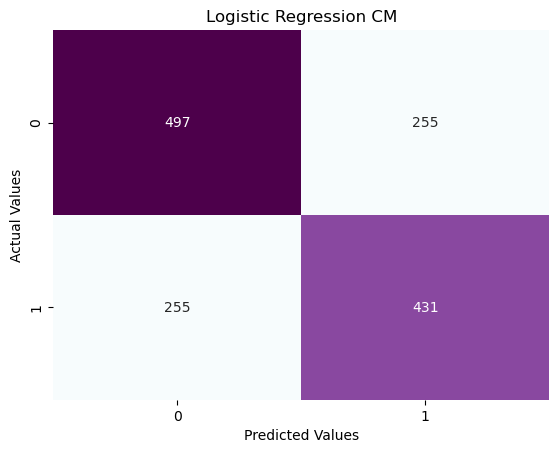

The confusion matrix after removing insignificant columns [[497 255]
 [255 431]]


In [88]:
print('Classificatio report after removing insignificant columns',classification_report(y_test,sig_predictions))
print('********')

print('Accuracy with Logistic Regression after removing insignificant columns: ',accuracy_score(y_test,sig_predictions))
print('********')

print('The confusion matrix after removing insignificant columns',my_confusion_matrix(y_test,sig_predictions,'Logistic Regression CM'))

In [89]:
# NOTE: We got nearly the same accuracy after droping arround 6-8 columns


## Implment the model using KNN algorithm

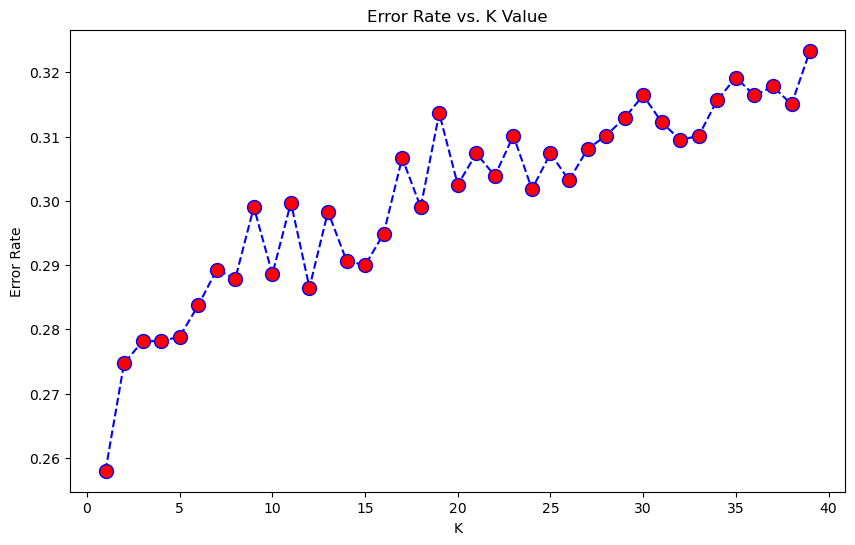

In [91]:
#Using KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
#Visualisation for the Error Rate/K-value 
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p=2)
    knn.fit(X_train_sig,y_train)
    pred_i_knn = knn.predict(X_valid_sig)
    error_rate.append(np.mean(pred_i_knn != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [92]:
#Notice that the lowest error rate is at k=1 

KNN Accuracy Score:  0.7420027816411683
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       752
           1       0.70      0.81      0.75       686

    accuracy                           0.74      1438
   macro avg       0.75      0.75      0.74      1438
weighted avg       0.75      0.74      0.74      1438



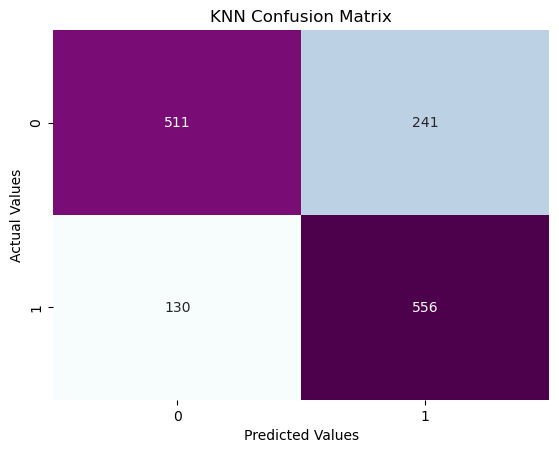

In [96]:
#Fitting the KNN model
knn_classifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p=2) # use n_neighbours = 1 from above graph 
knn_classifier.fit(X_train_sig, y_train)
y_pred_knn=knn_classifier.predict(X_test_sig)
print('KNN Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
cm_knn=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

In [97]:
#There is considerable increase in accuracy with K-NN 

# Run DecisionTree Classifier

In [119]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train_sig,y_train)
dtc

DecisionTreeClassifier()

In [120]:
dtc_predictions = dtc.predict(X_test_sig)

Decision Tree Classifier Accuracy Score:  0.7357440890125174
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       752
           1       0.72      0.73      0.73       686

    accuracy                           0.74      1438
   macro avg       0.74      0.74      0.74      1438
weighted avg       0.74      0.74      0.74      1438



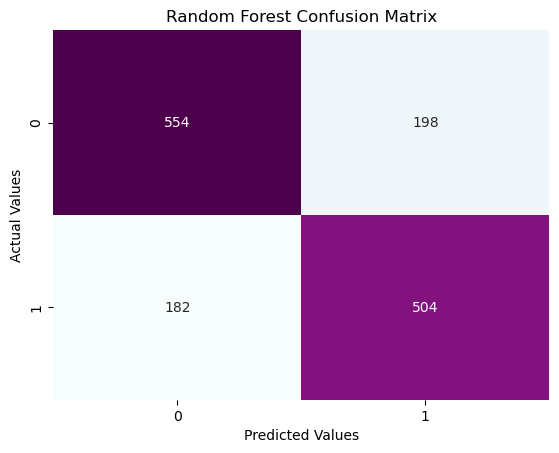

In [121]:
print('Decision Tree Classifier Accuracy Score: ',accuracy_score(y_test,dtc_predictions))
cm_rfc=my_confusion_matrix(y_test, dtc_predictions, 'Random Forest Confusion Matrix')

## Run Random Forest Classifier

Random Forest Classifier Accuracy Score:  0.7837273991655076
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       752
           1       0.77      0.78      0.77       686

    accuracy                           0.78      1438
   macro avg       0.78      0.78      0.78      1438
weighted avg       0.78      0.78      0.78      1438



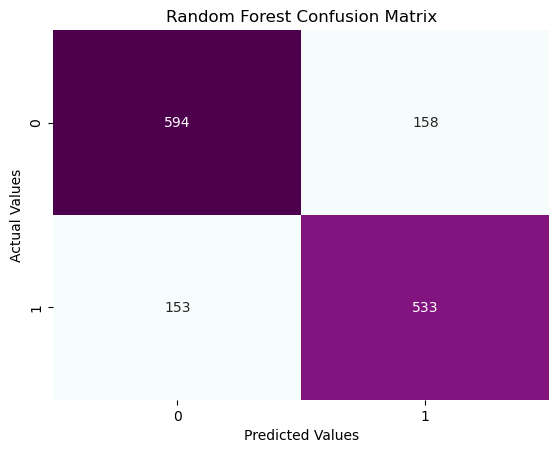

In [99]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 80,
                           max_features= 2,
                           min_samples_leaf= 3,
                           min_samples_split= 8,
                           n_estimators= 300,
                           random_state=0)
rfc.fit(X_train_sig, y_train)
y_pred_rfc=rfc.predict(X_test_sig)
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

Support Vector Machine Accuracy Score:  0.691933240611961
              precision    recall  f1-score   support

           0       0.74      0.64      0.68       752
           1       0.65      0.75      0.70       686

    accuracy                           0.69      1438
   macro avg       0.70      0.69      0.69      1438
weighted avg       0.70      0.69      0.69      1438



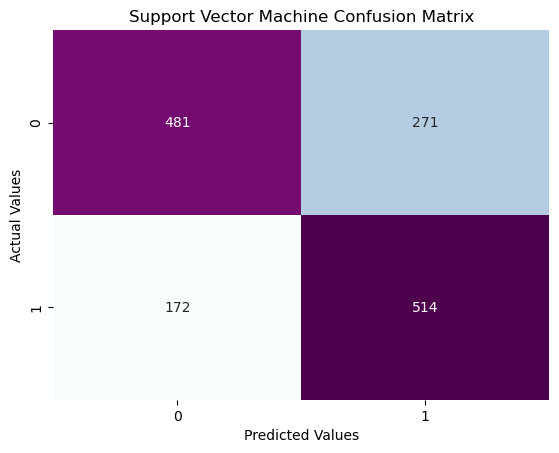

In [102]:
#Using Support Vector Machine
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=10)
svc.fit(X_train_sig, y_train)
y_pred_svc= svc.predict(X_valid_sig)
print('Support Vector Machine Accuracy Score: ',accuracy_score(y_test, y_pred_svc))
cm_svc=my_confusion_matrix(y_test, y_pred_svc, 'Support Vector Machine Confusion Matrix')

# Using XGBoost

XGBoost Accuracy Score:  0.8205841446453408
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       752
           1       0.82      0.79      0.81       686

    accuracy                           0.82      1438
   macro avg       0.82      0.82      0.82      1438
weighted avg       0.82      0.82      0.82      1438



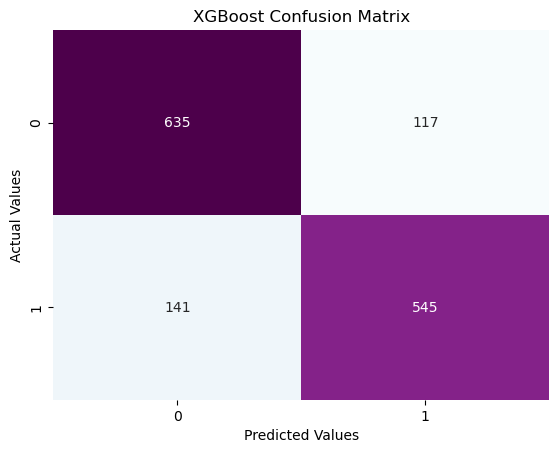

array([[635, 117],
       [141, 545]])

In [105]:

import xgboost as xgb
xgb_classifier=xgb.XGBClassifier(colsample_bytree= 0.6,
                                 eval_metric= 'logloss',
                                 gamma= 2,
                                 learning_rate= 0.1,
                                 max_depth= 5,
                                 min_child_weight= 1,
                                 subsample= 0.8,
                                 use_label_encoder=False,
                                 verbosity = 0)
xgb_classifier.fit(X_train_sig, y_train)
y_pred_xgb = xgb_classifier.predict(X_valid_sig)
accuracy_score(y_test,y_pred_xgb)
print('XGBoost Accuracy Score: ',accuracy_score(y_test, y_pred_xgb))
my_confusion_matrix(y_test, y_pred_xgb, 'XGBoost Confusion Matrix')

# Using neural network

In [115]:
#Using Neural Networks
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [116]:
#Adding an early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=25,  #Stop the model training if the accuracy doesnt increase in 25 Epochs
                   restore_best_weights=True)

NN_Classifier = model.fit(X_train, y_train,
                    batch_size=100,
                    epochs=1000,
                    callbacks =[es],
                    verbose=2,
                    validation_data=(X_test, y_test))

Epoch 1/1000
58/58 - 2s - loss: 0.6275 - accuracy: 0.6503 - val_loss: 0.6145 - val_accuracy: 0.6711 - 2s/epoch - 27ms/step
Epoch 2/1000
58/58 - 0s - loss: 0.5979 - accuracy: 0.6790 - val_loss: 0.6065 - val_accuracy: 0.6822 - 451ms/epoch - 8ms/step
Epoch 3/1000
58/58 - 0s - loss: 0.5834 - accuracy: 0.6944 - val_loss: 0.5811 - val_accuracy: 0.7003 - 491ms/epoch - 8ms/step
Epoch 4/1000
58/58 - 1s - loss: 0.5750 - accuracy: 0.6988 - val_loss: 0.5697 - val_accuracy: 0.7051 - 1s/epoch - 17ms/step
Epoch 5/1000
58/58 - 0s - loss: 0.5643 - accuracy: 0.7108 - val_loss: 0.5625 - val_accuracy: 0.7051 - 465ms/epoch - 8ms/step
Epoch 6/1000
58/58 - 1s - loss: 0.5523 - accuracy: 0.7157 - val_loss: 0.5535 - val_accuracy: 0.7086 - 573ms/epoch - 10ms/step
Epoch 7/1000
58/58 - 0s - loss: 0.5348 - accuracy: 0.7261 - val_loss: 0.5506 - val_accuracy: 0.7204 - 489ms/epoch - 8ms/step
Epoch 8/1000
58/58 - 0s - loss: 0.5249 - accuracy: 0.7360 - val_loss: 0.5500 - val_accuracy: 0.7274 - 460ms/epoch - 8ms/step
Epo

Epoch 66/1000
58/58 - 1s - loss: 0.1012 - accuracy: 0.9590 - val_loss: 0.5576 - val_accuracy: 0.8491 - 698ms/epoch - 12ms/step
Epoch 67/1000
58/58 - 1s - loss: 0.1048 - accuracy: 0.9574 - val_loss: 0.5201 - val_accuracy: 0.8547 - 586ms/epoch - 10ms/step
Epoch 68/1000
58/58 - 1s - loss: 0.1107 - accuracy: 0.9577 - val_loss: 0.5528 - val_accuracy: 0.8456 - 559ms/epoch - 10ms/step
Epoch 69/1000
58/58 - 0s - loss: 0.1025 - accuracy: 0.9624 - val_loss: 0.5542 - val_accuracy: 0.8408 - 459ms/epoch - 8ms/step
Epoch 70/1000
58/58 - 0s - loss: 0.1027 - accuracy: 0.9600 - val_loss: 0.4857 - val_accuracy: 0.8623 - 494ms/epoch - 9ms/step
Epoch 71/1000
58/58 - 0s - loss: 0.0949 - accuracy: 0.9649 - val_loss: 0.5552 - val_accuracy: 0.8547 - 386ms/epoch - 7ms/step
Epoch 72/1000
58/58 - 0s - loss: 0.0887 - accuracy: 0.9663 - val_loss: 0.5655 - val_accuracy: 0.8442 - 438ms/epoch - 8ms/step
Epoch 73/1000
58/58 - 0s - loss: 0.0964 - accuracy: 0.9640 - val_loss: 0.5818 - val_accuracy: 0.8456 - 408ms/epoch 

Epoch 131/1000
58/58 - 0s - loss: 0.0351 - accuracy: 0.9866 - val_loss: 0.6940 - val_accuracy: 0.8595 - 419ms/epoch - 7ms/step
Epoch 132/1000
58/58 - 0s - loss: 0.0444 - accuracy: 0.9833 - val_loss: 0.6771 - val_accuracy: 0.8581 - 456ms/epoch - 8ms/step
Epoch 133/1000
58/58 - 0s - loss: 0.0522 - accuracy: 0.9802 - val_loss: 0.7173 - val_accuracy: 0.8547 - 465ms/epoch - 8ms/step
Epoch 134/1000
58/58 - 1s - loss: 0.0419 - accuracy: 0.9830 - val_loss: 0.7012 - val_accuracy: 0.8567 - 536ms/epoch - 9ms/step
Epoch 135/1000
58/58 - 0s - loss: 0.0414 - accuracy: 0.9849 - val_loss: 0.6838 - val_accuracy: 0.8623 - 492ms/epoch - 8ms/step
Epoch 136/1000
58/58 - 0s - loss: 0.0531 - accuracy: 0.9819 - val_loss: 0.6777 - val_accuracy: 0.8505 - 488ms/epoch - 8ms/step
Epoch 137/1000
58/58 - 0s - loss: 0.0445 - accuracy: 0.9831 - val_loss: 0.7040 - val_accuracy: 0.8609 - 459ms/epoch - 8ms/step
Epoch 138/1000
58/58 - 0s - loss: 0.0479 - accuracy: 0.9833 - val_loss: 0.6657 - val_accuracy: 0.8588 - 430ms/e

45/45 [==============================] - 0s 4ms/step
Neural Networks Accuracy Score:  0.8769123783031989
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       752
           1       0.85      0.91      0.88       686

    accuracy                           0.88      1438
   macro avg       0.88      0.88      0.88      1438
weighted avg       0.88      0.88      0.88      1438



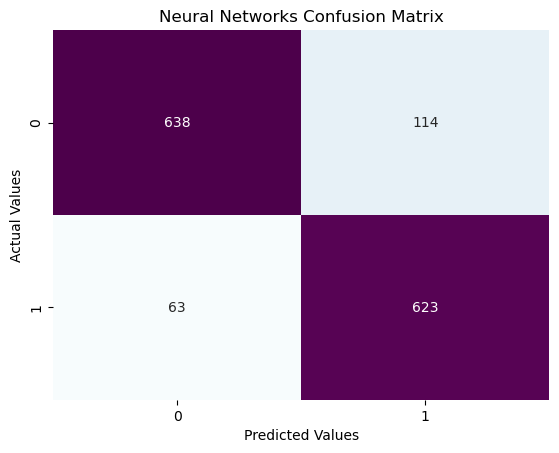

array([[638, 114],
       [ 63, 623]])

In [117]:
y_pred_NN=(model.predict(X_test) > 0.5).astype(int)   
print('Neural Networks Accuracy Score: ',accuracy_score(y_test, y_pred_NN))
my_confusion_matrix(y_test, y_pred_NN, 'Neural Networks Confusion Matrix')

In [109]:
#Plotting Neural Network Training and validation

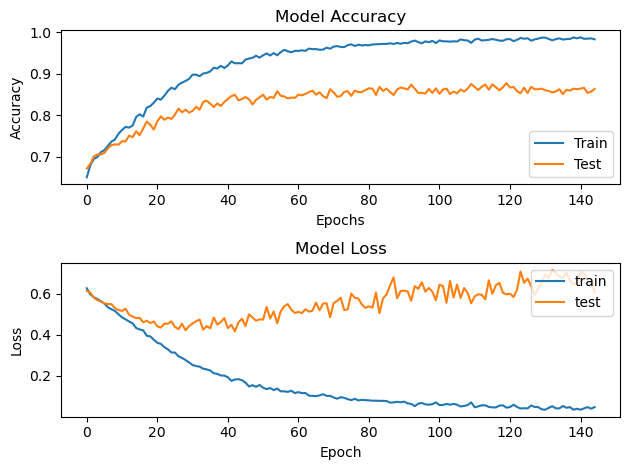

In [118]:
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()